### **Description:** The main purpose of this project is to predict the Passenger survived or not from Titanic disaster.


* Step-1: Download dataset from [https://www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data), store it in dataframe. 
* Step-2: Check for the columns which contain null values and apply feature engineering techniques as stated below:
        * Calculate mean of age separately for male and female and substitue it in places were null value occurs.
        * Calculate mean of fares and substitue it in places were null value occurs.
        * Replace null values of Embarked as S as that occurs the most.
* Step-3: We will drop Passenger ID, Name, Cabin and Ticket from Train and Test Dataset.
* Step-4: Next we need to convert the columns Sex and Embarked into numbers. We will do it with One Hot Encoding except reduce one categorical level to reduce number of columns.
* Step-5: Lets do some more feature Engineering:
        * Remove Outliers.
        * Create age groups fare groups and assign them numbers and create new columns of the same and drop fare and age.
* Step-6: Now that we our done with feature engineering and data is ready to be fed to the model lets try some ML algorithm and see which is the best
* Step-7: Create a dataframe with PassengerID and Survived value predicted for the test dataset using the ML algorithm which gives the best accuracy score to submit predicted value into required submission format


In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
%matplotlib inline



data_train=pd.read_csv('/train.csv')
data_test=pd.read_csv('/test.csv')

In [2]:
print("SHAPE")
print(data_train.shape)
print(data_test.shape)
print()

SHAPE
(891, 12)
(418, 11)



In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
print("NUMBER OF NULLS IN COLUMNS data_train: ")
data_train.isnull().sum()

NUMBER OF NULLS IN COLUMNS data_train: 


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
print("NUMBER OF NULLS IN COLUMNS data_test: ")
data_test.isnull().sum()

NUMBER OF NULLS IN COLUMNS data_test: 


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
data_train['CabinBool']=(data_train['Cabin'].notnull().astype('int'))
data_test['CabinBool']=(data_test['Cabin'].notnull().astype('int'))

In [8]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinBool
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


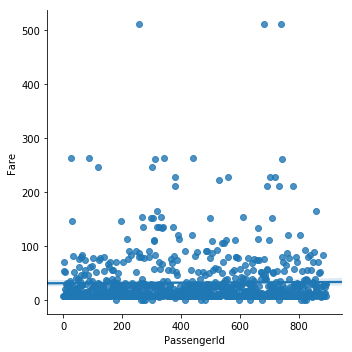

In [9]:
sns.lmplot(x="PassengerId", y="Fare", data=data_train, fit_reg=True)

In [10]:
data_train.loc[data_train['Fare']>300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinBool
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,0
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,1
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,1


In [11]:
data_train=data_train[data_train['Fare']<300]

sns.lmplot(x="PassengerId", y="Fare", data=data_train, fit_reg=True)

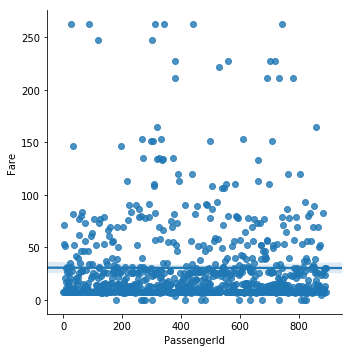

In [12]:
sns.lmplot(x="PassengerId", y="Fare", data=data_train, fit_reg=True)

In [13]:
data_train.drop('Cabin', axis=1, inplace=True)
data_test.drop('Cabin', axis=1, inplace=True)

data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,CabinBool
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.006916 -0.033005  0.036181 -0.056929 -0.002223   
Survived       -0.006916  1.000000 -0.334068 -0.079472 -0.033395  0.082157   
Pclass         -0.033005 -0.334068  1.000000 -0.368625  0.080937  0.018212   
Age             0.036181 -0.079472 -0.368625  1.000000 -0.307639 -0.189194   
SibSp          -0.056929 -0.033395  0.080937 -0.307639  1.000000  0.415141   
Parch          -0.002223  0.082157  0.018212 -0.189194  0.415141  1.000000   
Fare           -0.002046  0.261742 -0.604960  0.100396  0.211816  0.263910   
CabinBool       0.015341  0.314549 -0.725906  0.249278 -0.038959  0.036257   

                 Fare  CabinBool  
PassengerId -0.002046   0.015341  
Survived     0.261742   0.314549  
Pclass      -0.604960  -0.725906  
Age          0.100396   0.249278  
SibSp        0.211816  -0.038959  
Parch        0.263910   0.036257  
Fare         1.000000   0.543796  
CabinBool    0.54

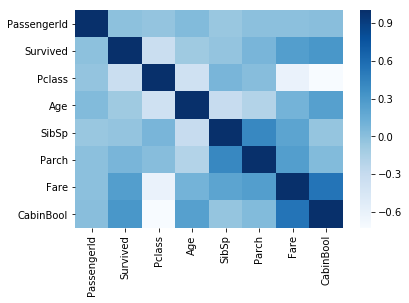

In [14]:
corr=data_train.corr()
print(corr)
sns.heatmap(corr, cmap="Blues")

In [16]:
data_train["Age"].fillna(data_train.groupby("Sex")["Age"].transform("mean"), inplace=True)
data_test['Age'].fillna(data_test.groupby('Sex')['Age'].transform("mean"), inplace=True)

bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
data_train['AgeGroup'] = pd.cut(data_train["Age"], bins, labels = labels)
data_test['AgeGroup'] = pd.cut(data_test["Age"], bins, labels = labels)

age_mapping={'Baby':1, 'Child':2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
data_train['AgeGroup']=data_train['AgeGroup'].map(age_mapping)
data_test['AgeGroup']=data_test['AgeGroup'].map(age_mapping)


data_train = data_train.drop(['Age'], axis = 1)
data_test = data_test.drop(['Age'], axis = 1)

In [16]:
#data_train.hist(data_train['Age'], bins=6)

In [22]:
data_train['Embarked'].fillna("S", inplace=True)
data_test['Fare'].fillna(data_test["Fare"].mean(), inplace=True)

print("NUMBER OF NULLS IN COLUMNS: ")
data_train.isnull().sum()

KeyError: 'Fare'

In [20]:
data_train['FareGroups']=pd.qcut(data_train['Fare'], 4, labels=[1, 2, 3, 4])
data_test['FareGroups']=pd.qcut(data_test['Fare'], 4, labels=[1, 2, 3, 4])

data_train=data_train.drop(['Fare'], axis=1)
data_test=data_test.drop(['Fare'], axis=1)

In [25]:
data_train=pd.get_dummies(data_train, columns=['Sex', 'Embarked'], drop_first=True)
data_test=pd.get_dummies(data_test, columns=['Sex', 'Embarked'], drop_first=True)

data_train=data_train.drop(["PassengerId", "Name", "Ticket"], axis=1)
data_test=data_test.drop(["Name", "Ticket"], axis=1)
data_test.tail()

ValueError: labels ['Sex' 'Embarked'] not contained in axis

In [26]:
data_train.head()

,Survived,Pclass,SibSp,Parch,CabinBool,AgeGroup,FareGroups,Sex_male,Embarked_Q,Embarked_S
0,0,3,1,0,0,4,1,1,0,1
1,1,1,1,0,1,6,4,0,0,0
2,1,3,0,0,0,5,2,0,0,1
3,1,1,1,0,1,5,4,0,0,1
4,0,3,0,0,0,5,2,1,0,1


In [27]:
data_test.tail()

,PassengerId,Pclass,SibSp,Parch,CabinBool,AgeGroup,FareGroups,Sex_male,Embarked_Q,Embarked_S
413,1305,3,0,0,0,5,2,1,0,1
414,1306,1,0,0,1,6,4,0,0,0
415,1307,3,0,0,0,6,1,1,0,1
416,1308,3,0,0,0,5,2,1,0,1
417,1309,3,1,1,0,5,3,1,0,0


In [28]:
X_train=data_train.drop(["Survived"], axis=1)
Y_train=data_train.Survived
X_test=data_test.drop(["PassengerId"], axis=1).copy()

X_train.shape, Y_train.shape, X_test.shape

((888, 9), (888,), (418, 9))

In [175]:
#Logistic Regression
logreg=LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred=logreg.predict(X_test)
acc_log=round(logreg.score(X_train, Y_train)*100, 2)
acc_log

80.409999999999997

In [29]:
random_forest=RandomForestClassifier()
random_forest.fit(X_train, Y_train)
Y_pred=random_forest.predict(X_test)
acc_random_forest=round(random_forest.score(X_train, Y_train)*100, 2)
acc_random_forest

89.75

In [30]:
svc=SVC()
svc.fit(X_train, Y_train)
Y_pred=svc.predict(X_test)
acc_svc=round(svc.score(X_train, Y_train)*100, 2)
acc_svc

83.219999999999999

In [31]:
decision_tree=DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred_sub=decision_tree.predict(X_test)
acc_decision_tree=round(decision_tree.score(X_train, Y_train)*100, 2)
acc_decision_tree

90.319999999999993

In [32]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

85.590000000000003

In [33]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, Y_train)
Y_pred = naive_bayes.predict(X_test)
acc_naive_bayes = round(naive_bayes.score(X_train, Y_train) * 100, 2)
acc_naive_bayes

78.040000000000006

In [182]:
models=pd.DataFrame({'Model':['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Decision Tree'],
                    'Score':[acc_svc, acc_knn, acc_log, acc_random_forest, acc_naive_bayes, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
5,Decision Tree,90.32
3,Random Forest,89.75
1,KNN,85.59
0,Support Vector Machines,83.22
2,Logistic Regression,80.41
4,Naive Bayes,78.04


In [184]:
submission=pd.DataFrame({"PassengerId" : data_test["PassengerId"], "Survived":Y_pred_sub})
submission.to_csv('submit65.csv', index=False)

In [ ]:
# Conclusion

* The  Algorithm gives the best accuracy is Decision Tree with 90.32% for the given dataset.

|       Algorithm       | Accuracy |
|:----------------------|:--------:|
|     Decision Tree     |  90.32%  |
|     Random Forest     |  89.75%  |      
|          KNN          |  85.59%  |
|Support Vector Machine |  27.65%  |
|  Logistic Regression  |        |      
|      Naive Bayes      |  19.96%  |

